## Fase 2

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:


# Descargar el dataset
path = kagglehub.dataset_download("josetroyatoscano/covid19-colombia-complete-dataset-dec-2023")

print("Dataset downloaded to:", path)
# Configuraci√≥n para visualizaciones
plt.style.use('default')
sns.set_palette("husl")

# Ubicaci√≥n del dataset
path_dataset = path + "/COVID19 COLOMBIA - Complete Dataset DEC-2023.csv"
print("Dataset", path_dataset)
# Cargar el dataset
df = pd.read_csv(path_dataset)

Dataset downloaded to: /Users/fabianferrer/.cache/kagglehub/datasets/josetroyatoscano/covid19-colombia-complete-dataset-dec-2023/versions/1
Dataset /Users/fabianferrer/.cache/kagglehub/datasets/josetroyatoscano/covid19-colombia-complete-dataset-dec-2023/versions/1/COVID19 COLOMBIA - Complete Dataset DEC-2023.csv


/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_94779/1742720016.py:13: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_dataset)


In [46]:
df.head()

fecha reporte web  ID de caso Fecha de notificaci√≥n  \
0  2020-12-24 00:00:00     1556979   2020-12-22 00:00:00   
1  2020-12-24 00:00:00     1556980   2020-12-19 00:00:00   
2  2020-12-24 00:00:00     1556981   2020-12-19 00:00:00   
3  2020-12-24 00:00:00     1556982   2020-12-22 00:00:00   
4  2020-12-24 00:00:00     1556983   2020-12-22 00:00:00   

   C√≥digo DIVIPOLA departamento Nombre departamento  \
0                            76               VALLE   
1                            76               VALLE   
2                            76               VALLE   
3                            76               VALLE   
4                            76               VALLE   

   C√≥digo DIVIPOLA municipio Nombre municipio  Edad  Unidad de medida de edad  \
0                      76001             CALI    67                         1   
1                      76001             CALI    66                         1   
2                      76001             CALI    68                         1   
3                      76001             CALI    74                         1   
4                      76001             CALI    65                         1   

  Sexo  ... C√≥digo ISO del pa√≠s Nombre del pa√≠s  Recuperado  \
0    F  ...                 NaN             NaN  Recuperado   
1    F  ...                 NaN             NaN  Recuperado   
2    F  ...                 NaN             NaN  Recuperado   
3    F  ...                 NaN             NaN   Fallecido   
4    F  ...                 NaN             NaN  Recuperado   

   Fecha de inicio de s√≠ntomas      Fecha de muerte Fecha de diagn√≥stico  \
0          2020-12-21 00:00:00                  NaN  2020-12-23 00:00:00   
1          2020-12-07 00:00:00                  NaN  2020-12-23 00:00:00   
2          2020-12-18 00:00:00                  NaN  2020-12-22 00:00:00   
3          2020-12-17 00:00:00  2020-12-30 00:00:00  2020-12-23 00:00:00   
4          2020-12-21 00:00:00                  NaN  2020-12-23 00:00:00   

  Fecha de recuperaci√≥n Tipo de recuperaci√≥n Pertenencia √©tnica  \
0   2021-01-04 00:00:00               Tiempo                6.0   
1   2020-12-25 00:00:00               Tiempo                6.0   
2   2021-01-01 00:00:00               Tiempo                6.0   
3                   NaN                  NaN                6.0   
4   2021-01-04 00:00:00               Tiempo                6.0   

  Nombre del grupo √©tnico  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  

[5 rows x 23 columns]

In [43]:
# Analizamos los datos faltantes de cada una de las columnas del dataframe
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_percent], axis=1, keys=["Faltantes", "%"])

Faltantes          %
C√≥digo ISO del pa√≠s             6383439  99.941977
Nombre del pa√≠s                 6383431  99.941852
Nombre del grupo √©tnico         6303291  98.687144
Fecha de muerte                 6202835  97.114360
Fecha de inicio de s√≠ntomas      505292   7.911078
Tipo de recuperaci√≥n             180390   2.824267
Fecha de recuperaci√≥n            180316   2.823108
Estado                            41200   0.645046
Ubicaci√≥n del caso                41200   0.645046
Recuperado                        36260   0.567703
Fecha de diagn√≥stico               2755   0.043134
Pertenencia √©tnica                  560   0.008768
Sexo                                  0   0.000000
Tipo de contagio                      0   0.000000
ID de caso                            0   0.000000
Unidad de medida de edad              0   0.000000
Edad                                  0   0.000000
Nombre municipio                      0   0.000000
C√≥digo DIVIPOLA municipio             0   0.000000
Nombre departamento                   0   0.000000
C√≥digo DIVIPOLA departamento          0   0.000000
Fecha de notificaci√≥n                 0   0.000000
fecha reporte web                     0   0.000000

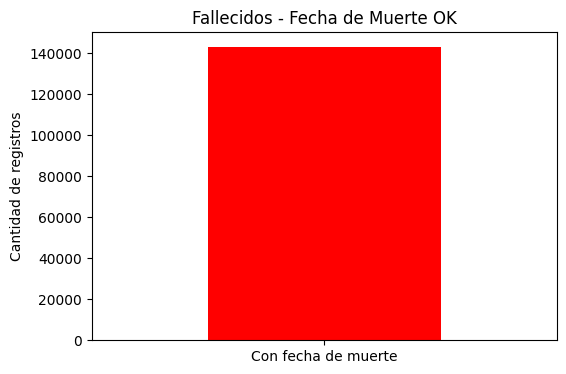

(143110, 23)

In [44]:
# Revisar graficamente la cantidad de campos faltantes (NaN) en la columna "Fecha de muerte" para el Estado "Fallecido", con esto, podemos concluir
# si es necesario eliminar la columna o no es necesario para pr√≥ximos an√°lisis

import matplotlib.pyplot as plt

# Filtrar solo los fallecidos
df_fallecidos = df[df["Estado"] == "Fallecido"]

# Contar nulos y no nulos en la columna fecha de muerte
conteo = df_fallecidos["Fecha de muerte"].isnull().value_counts()

# Renombrar los √≠ndices: True = Sin fecha, False = Con fecha
labels_map = {True: "Sin fecha de muerte", False: "Con fecha de muerte"}
conteo.index = [labels_map[i] for i in conteo.index]

# Gr√°fico
conteo.plot(kind="bar", color=["red", "green"], figsize=(6,4))
plt.title("Fallecidos - Fecha de Muerte OK")
plt.ylabel("Cantidad de registros")
plt.xlabel("")
plt.xticks(rotation=0)
plt.show()

df_fallecidos.shape

In [8]:
# Resumen global vs. fallecidos: Comparamos nulos en "Fecha de muerte" a nivel general y solo en Estado "Fallecido",para verificar si la 
# columna es consistente y decidir si mantenerla o no

# Datos globales
total_nulos = df["Fecha de muerte"].isnull().sum()
total_registros = len(df)
porcentaje_nulos_total = (total_nulos / total_registros) * 100

# Datos solo de fallecidos
fallecidos = df[df["Estado"] == "Fallecido"]
nulos_fallecidos = fallecidos["Fecha de muerte"].isnull().sum()
total_fallecidos = len(fallecidos)
porcentaje_nulos_fallecidos = (nulos_fallecidos / total_fallecidos) * 100

# Crear tabla resumen
tabla_resumen = pd.DataFrame({
    "√Åmbito": ["Dataset completo", "Solo Fallecidos"],
    "Total registros": [total_registros, total_fallecidos],
    "Nulos 'Fecha de muerte'": [total_nulos, nulos_fallecidos],
    "% Nulos": [porcentaje_nulos_total, porcentaje_nulos_fallecidos]
})

print(tabla_resumen)

             √Åmbito  Total registros  Nulos 'Fecha de muerte'   % Nulos
0  Dataset completo          6387145                  6202835  97.11436
1   Solo Fallecidos           143110                        0   0.00000


In [9]:
# Se identificaron varias columnas con datos faltantes. Eliminamos aquellas con m√°s del 95% de valores nulos,
# excepto "Fecha de muerte". Aunque presenta muchos nulos a nivel global (debido a estados distintos a "Fallecido"),
# en los registros de fallecidos est√° completa al 100%, por lo que se conserva para futuros an√°lisis

# Eliminar las columnas no deseadas seg√∫n el an√°lisis previo
columnas_a_eliminar = [
    "C√≥digo ISO del pa√≠s",
    "Nombre del pa√≠s",
    "Nombre del grupo √©tnico"
]
df = df.drop(columns=columnas_a_eliminar)

# Guardar un nuevo CSV sin esas columnas
df.to_csv("dataset_limpio.csv", index=False, encoding="utf-8-sig")


In [10]:
# Cargamos el dataset limpio desde un archivo CSV local
df = pd.read_csv("dataset_limpio.csv")

# Analizamos nuevamente los datos faltantes de cada una de las columnas del dataframe para confirmar que se eliminaron 
# las columnas con m√°s del 95% de datos faltantes
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_percent], axis=1, keys=["Faltantes", "%"])

Faltantes          %
Fecha de muerte                 6202835  97.114360
Fecha de inicio de s√≠ntomas      505292   7.911078
Tipo de recuperaci√≥n             180390   2.824267
Fecha de recuperaci√≥n            180316   2.823108
Estado                            41200   0.645046
Ubicaci√≥n del caso                41200   0.645046
Recuperado                        36260   0.567703
Fecha de diagn√≥stico               2755   0.043134
Pertenencia √©tnica                  560   0.008768
ID de caso                            0   0.000000
fecha reporte web                     0   0.000000
Sexo                                  0   0.000000
Unidad de medida de edad              0   0.000000
Edad                                  0   0.000000
Nombre municipio                      0   0.000000
C√≥digo DIVIPOLA municipio             0   0.000000
Nombre departamento                   0   0.000000
C√≥digo DIVIPOLA departamento          0   0.000000
Fecha de notificaci√≥n                 0   0.000000
Tipo de contagio                      0   0.000000

In [11]:
import numpy as np

def outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

# Ejemplo sobre todas las columnas num√©ricas
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    outliers, low, up = outliers_iqr(df, col)
    print(f"Columna: {col}")
    print(f"   Rango aceptado: [{low:.2f}, {up:.2f}]")
    print(f"   N¬∫ de outliers detectados: {len(outliers)}\n")


Columna: ID de caso
   Rango aceptado: [-3193531.00, 9580757.00]
   N¬∫ de outliers detectados: 0

Columna: C√≥digo DIVIPOLA departamento
   Rango aceptado: [-74.50, 153.50]
   N¬∫ de outliers detectados: 526240

Columna: C√≥digo DIVIPOLA municipio
   Rango aceptado: [-50499.00, 113501.00]
   N¬∫ de outliers detectados: 0

Columna: Edad
   Rango aceptado: [-12.00, 92.00]
   N¬∫ de outliers detectados: 14929

Columna: Unidad de medida de edad
   Rango aceptado: [1.00, 1.00]
   N¬∫ de outliers detectados: 32893

Columna: Pertenencia √©tnica
   Rango aceptado: [6.00, 6.00]
   N¬∫ de outliers detectados: 222119



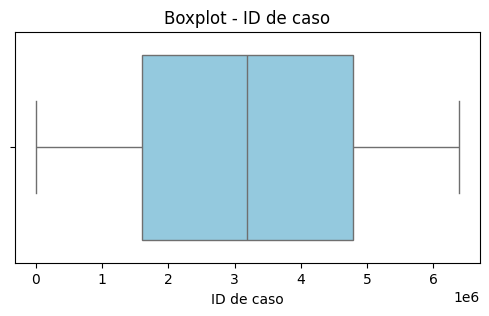

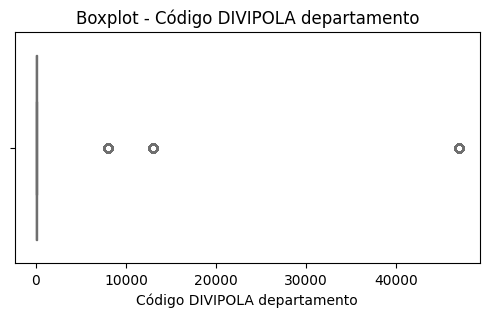

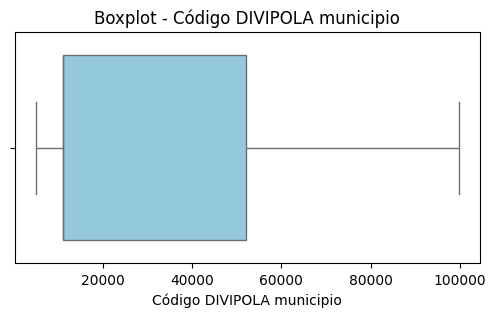

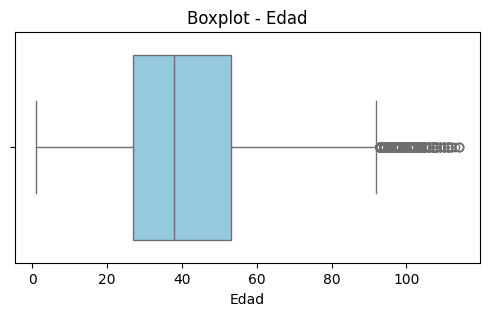

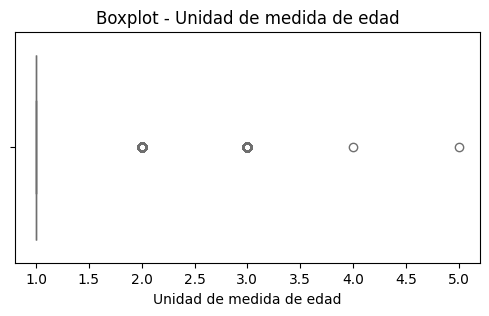

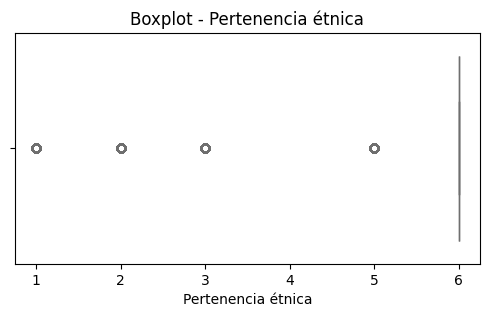

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot - {col}")
    plt.show()


In [13]:
# Verificar cu√°ntas edades negativas hay para definir si se hace imputaci√≥n o eliminaci√≥n de registros
print("Cantidad de edades negativas:", (df["Edad"] < 0).sum())

Cantidad de edades negativas: 0


In [14]:
# Revisi√≥n de valores at√≠picos en Edad
## - El rango aceptado por IQR fue: [-12, 92]
## - Aunque el l√≠mite inferior result√≥ negativo, no existen registros con edades < 0 en la BD
## - Por lo tanto, no fue necesario realizar imputaci√≥n o eliminaci√≥n de registros en este caso

In [15]:
# Lista de c√≥digos v√°lidos de departamentos
codigos_validos = [5, 8, 11, 13, 15, 17, 18, 19, 20, 23, 25, 27, 41, 
                   44, 47, 50, 52, 54, 63, 66, 68, 70, 73, 76, 81, 85, 
                   86, 88, 91, 94, 95, 97, 99]

# Reemplazar valores inv√°lidos con NaN
df.loc[~df["C√≥digo DIVIPOLA departamento"].isin(codigos_validos), "C√≥digo DIVIPOLA departamento"] = np.nan

# Ver cu√°ntos quedaron como NaN
print("Valores nulos en departamento:", df["C√≥digo DIVIPOLA departamento"].isna().sum())

# Revisar valores √∫nicos despu√©s de la limpieza
print("Valores √∫nicos en departamento:", df["C√≥digo DIVIPOLA departamento"].unique())


Valores nulos en departamento: 526240
Valores √∫nicos en departamento: [76.  5. 68. 54. 17. 11. 25. 18. 63. 66. 85. 52. 41. 20. 50. nan 73. 19.
 70. 13. 44.  8. 23. 47. 81. 15. 88. 27. 95. 99. 86. 97. 94. 91.]


In [16]:
# Revisar rango de c√≥digos de municipios
print("M√≠nimo:", df["C√≥digo DIVIPOLA municipio"].min())
print("M√°ximo:", df["C√≥digo DIVIPOLA municipio"].max())

M√≠nimo: 5001
M√°ximo: 99773


In [17]:
# En este caso, no se encontraron valores fuera del rango esperado, por lo que no se realizaron cambios adicionales en la columna.

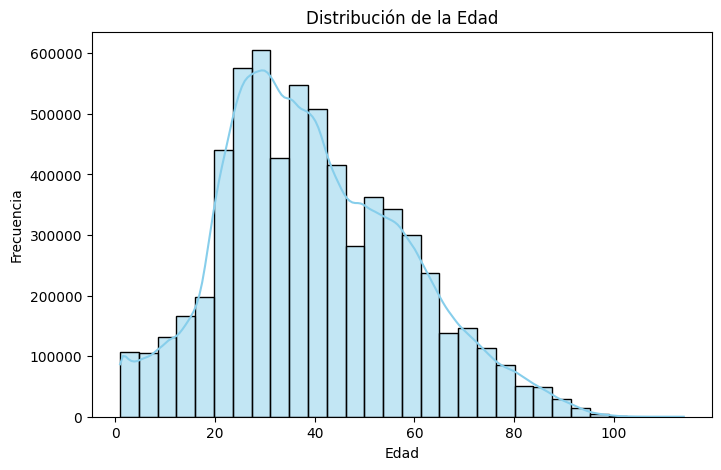

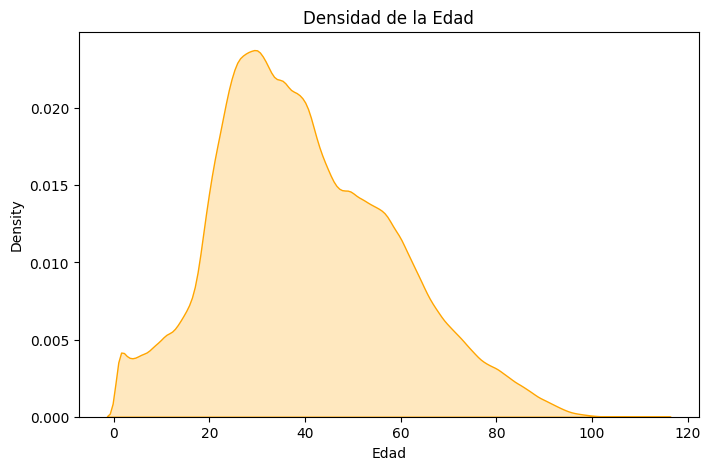

Asimetr√≠a (Skewness): 0.39
Curtosis: -0.21


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import numpy as np

# Histograma + curva de densidad
plt.figure(figsize=(8,5))
sns.histplot(df['Edad'].dropna(), kde=True, bins=30, color='skyblue')
plt.title("Distribuci√≥n de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Gr√°fica de densidad (KDE)
plt.figure(figsize=(8,5))
sns.kdeplot(df['Edad'].dropna(), fill=True, color='orange')
plt.title("Densidad de la Edad")
plt.xlabel("Edad")
plt.show()

# Estad√≠sticos de forma
edad = df['Edad'].dropna()
print(f"Asimetr√≠a (Skewness): {skew(edad):.2f}")
print(f"Curtosis: {kurtosis(edad):.2f}")

# Ejemplo de transformaci√≥n logar√≠tmica (si hay sesgo fuerte)
df['Edad_log'] = np.log1p(df['Edad'])  # log(edad+1)


In [19]:
# An√°lisis de la variable Edad
# - La distribuci√≥n se inclina un poco hacia la derecha (personas de mayor edad)
# - Tiene una forma parecida a la normal, sin colas muy raras
# - La mayor√≠a est√° entre 20 y 40 a√±os, con un pico en 20-35
# - Despu√©s de los 60 a√±os la frecuencia baja poco a poco
# - En conclusi√≥n: se parece bastante a una normal, con un ligero sesgo, por lo que no es necesario aplicar transformaciones.

# Las dem√°s variables num√©ricas no se analizan en detalle, ya que no son de inter√©s principal en este estudio. 
# Adem√°s, muchas de ellas representan categor√≠as o conteos (por ejemplo, los c√≥digos DIVIPOLA de departamentos y municipios), 
# por lo que no requieren un an√°lisis estad√≠stico profundo.


Estad√≠sticos descriptivos de variables categ√≥ricas:


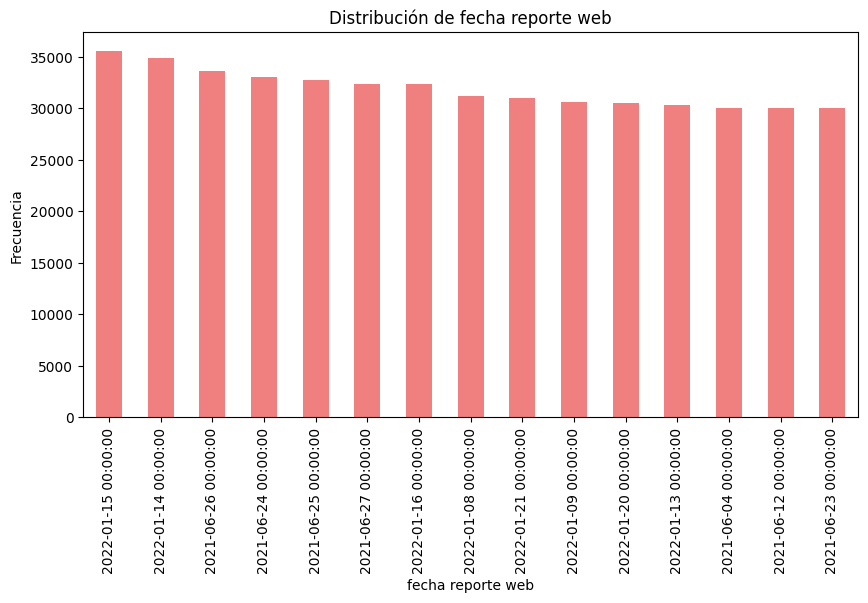

üî∏ fecha reporte web: 869 categor√≠as


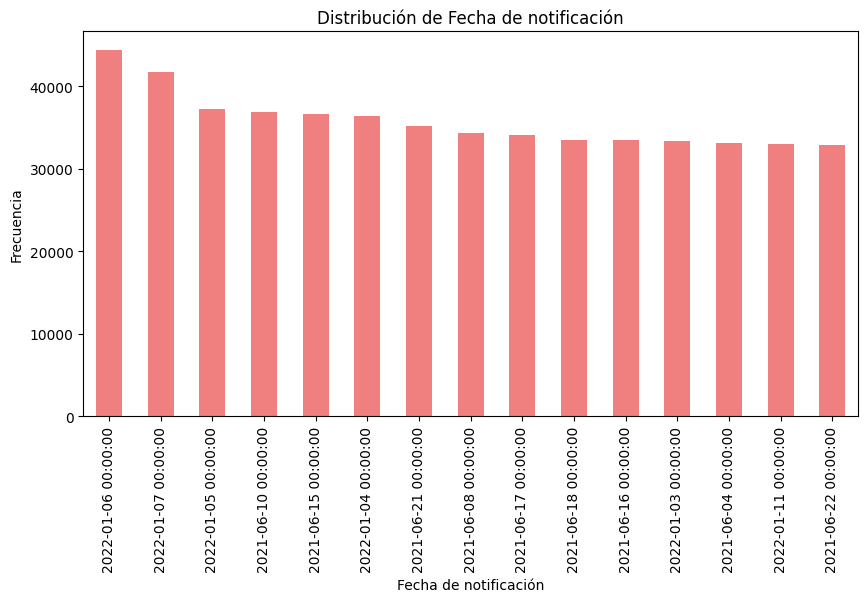

üî∏ Fecha de notificaci√≥n: 1392 categor√≠as


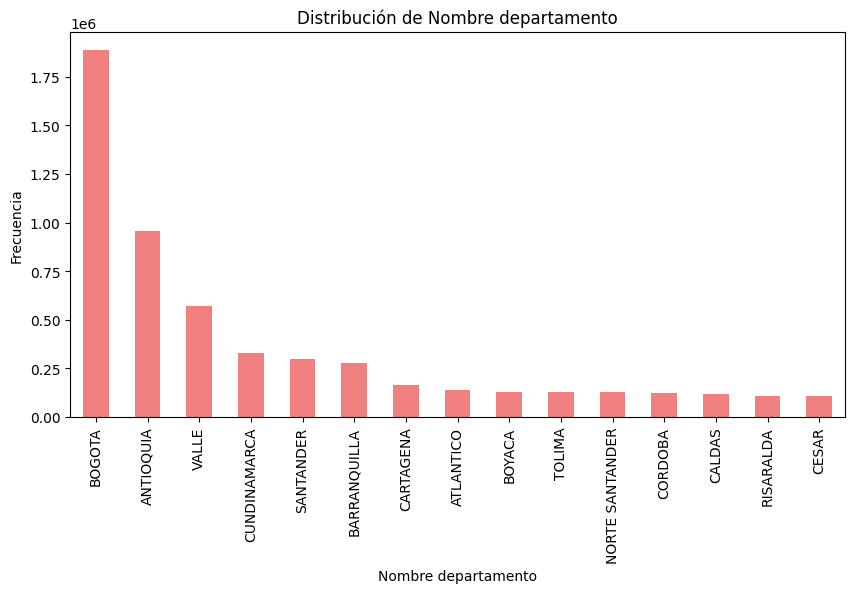

üî∏ Nombre departamento: 41 categor√≠as


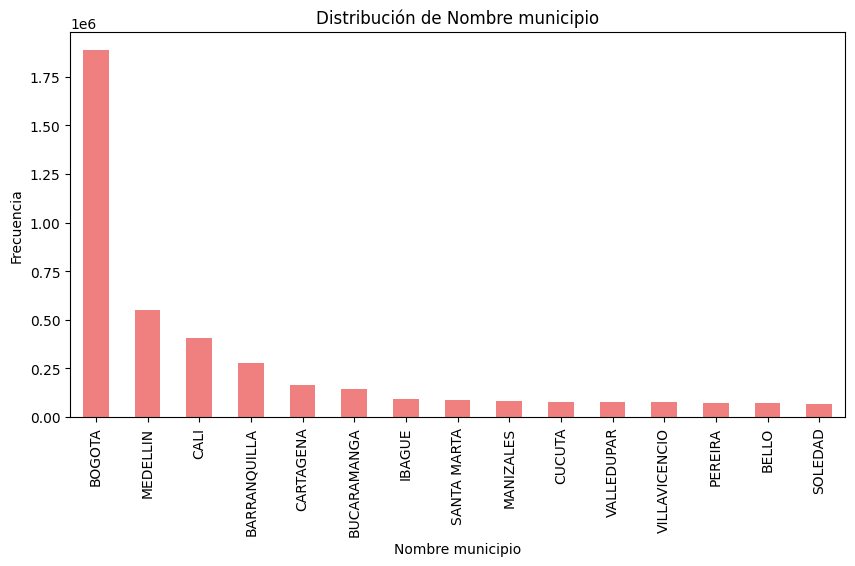

üî∏ Nombre municipio: 1057 categor√≠as


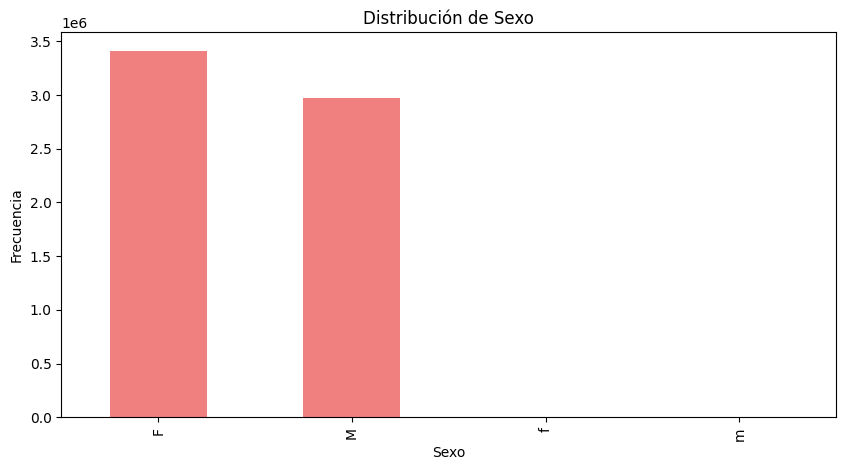

üî∏ Sexo: 4 categor√≠as


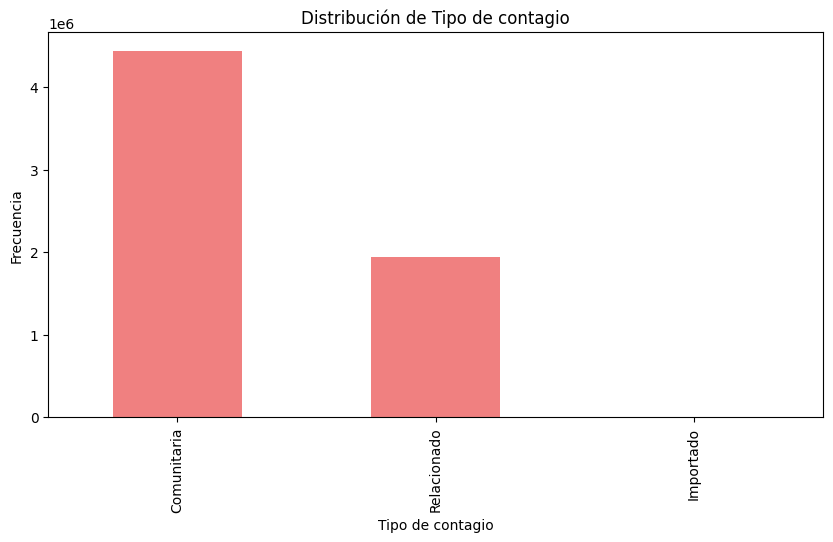

üî∏ Tipo de contagio: 3 categor√≠as


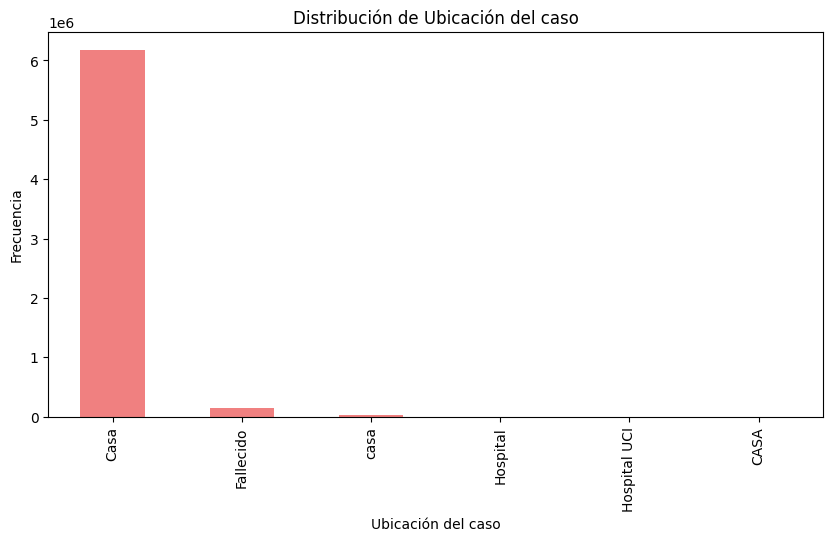

üî∏ Ubicaci√≥n del caso: 6 categor√≠as


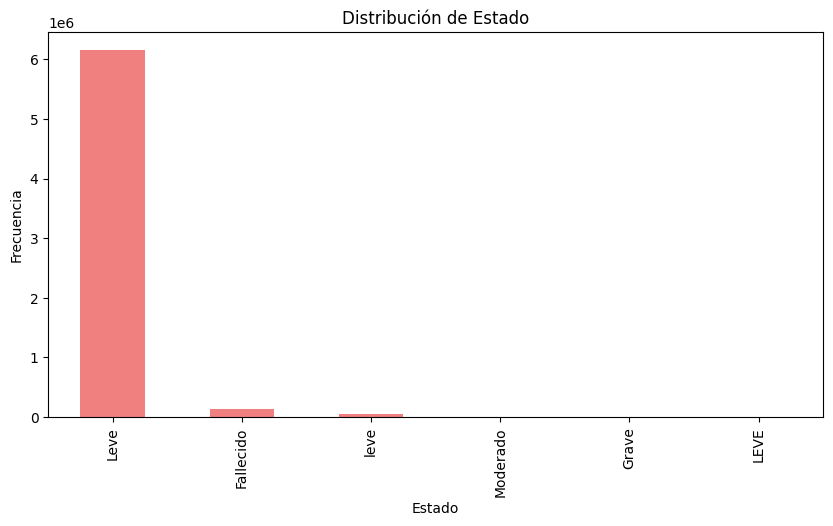

üî∏ Estado: 6 categor√≠as


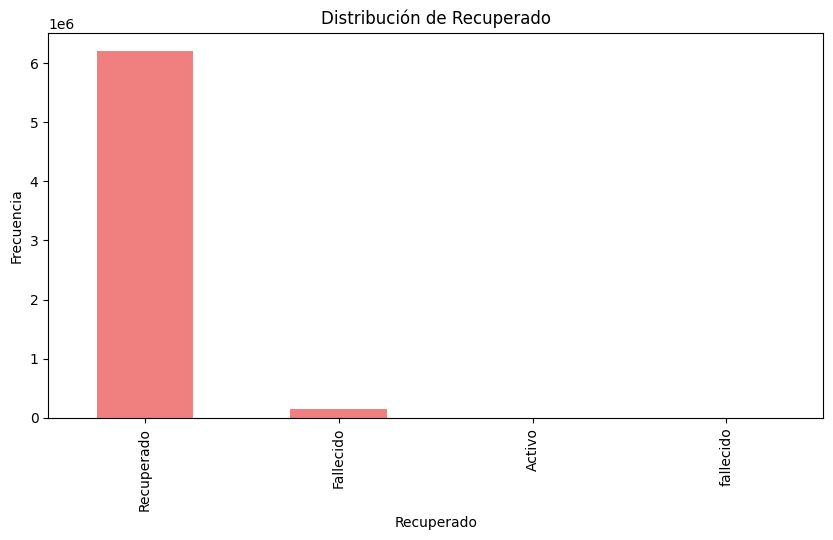

üî∏ Recuperado: 4 categor√≠as


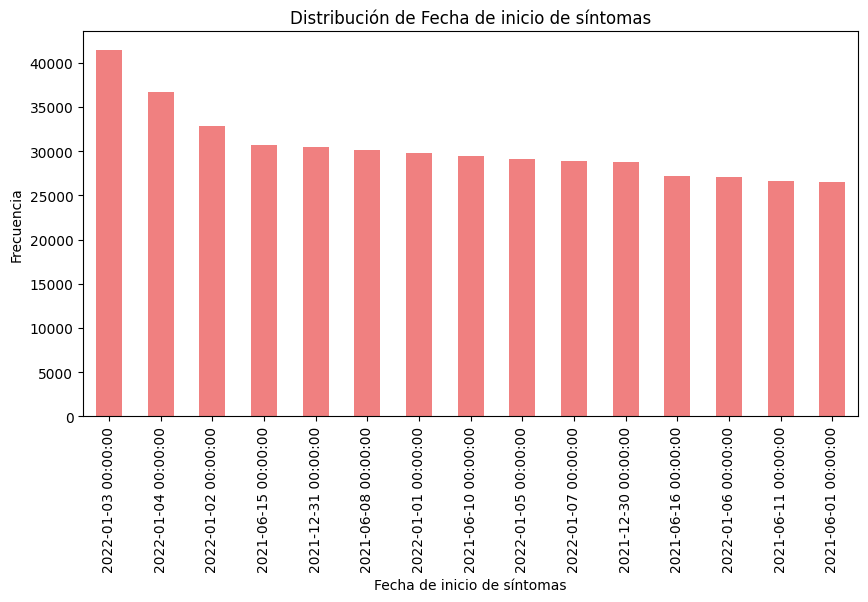

üî∏ Fecha de inicio de s√≠ntomas: 1397 categor√≠as


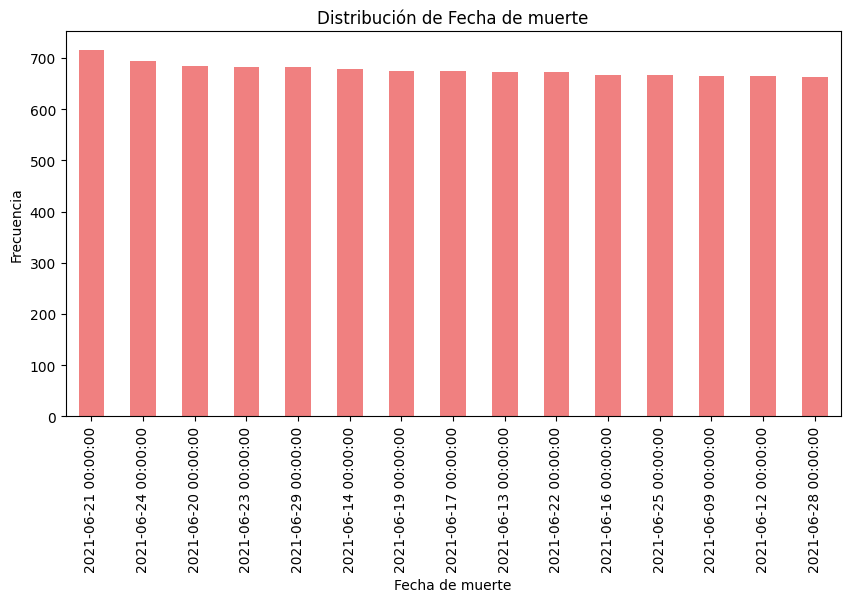

üî∏ Fecha de muerte: 1370 categor√≠as


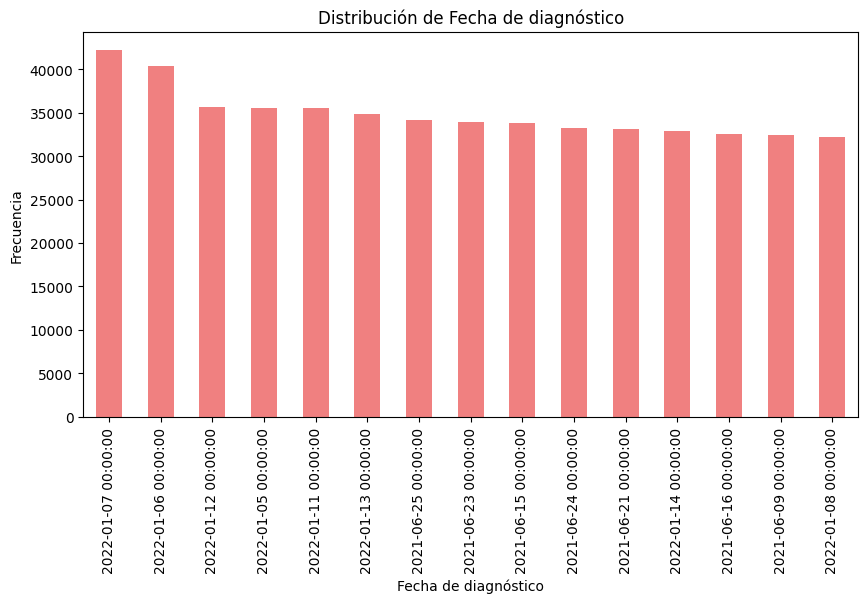

üî∏ Fecha de diagn√≥stico: 1389 categor√≠as


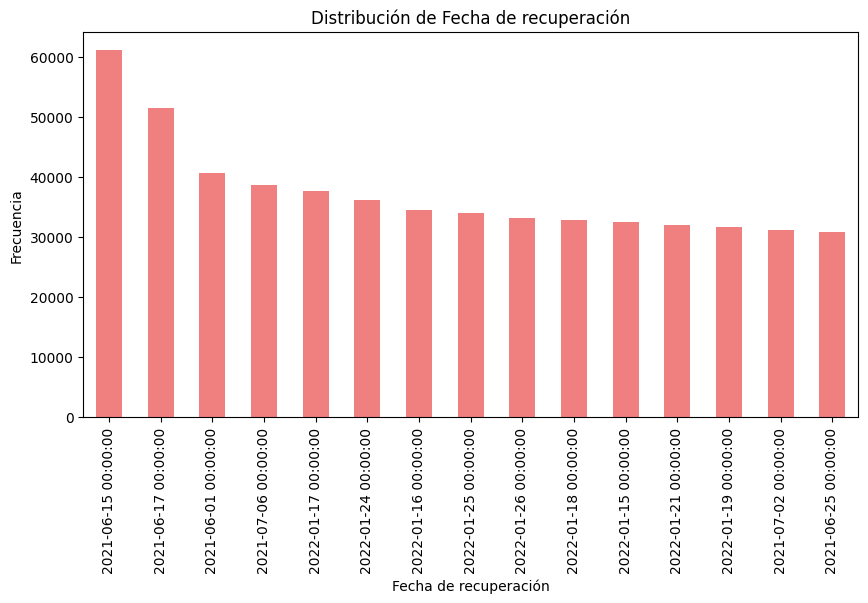

üî∏ Fecha de recuperaci√≥n: 966 categor√≠as


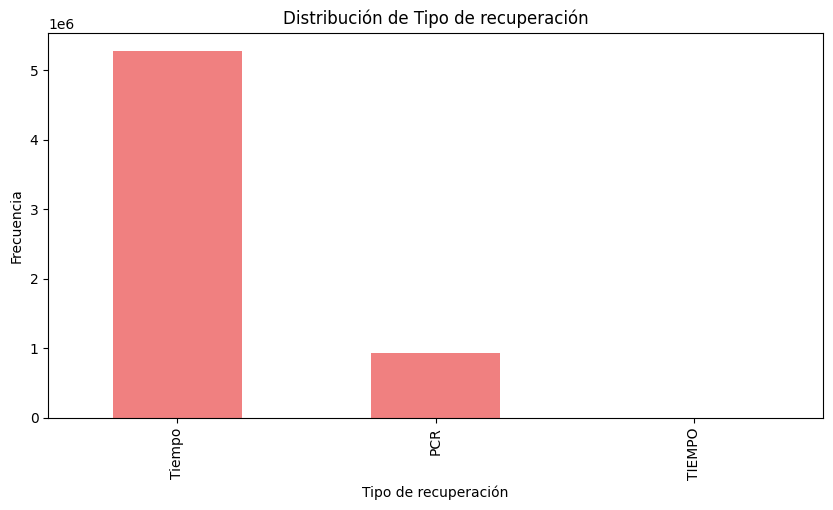

üî∏ Tipo de recuperaci√≥n: 3 categor√≠as


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew, kurtosis

# Separar variables categ√≥ricas
cat_cols = df.select_dtypes(include=['object','category']).columns

print("\nEstad√≠sticos descriptivos de variables categ√≥ricas:")

for col in cat_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(15).plot(kind="bar", color="lightcoral")
    plt.title(f"Distribuci√≥n de {col}")
    plt.ylabel("Frecuencia")
    plt.xlabel(col)
    plt.show()
    
    print(f"üî∏ {col}: {df[col].nunique()} categor√≠as")


In [21]:
# A partir de las gr√°ficas se puede observar que algunas categor√≠as presentan inconsistencias debido a errores tipogr√°ficos 
# o diferencias en may√∫sculas/min√∫sculas. Por ejemplo: ("Tiempo" y "TIEMPO"), ("Fallecido" y "fallecido"), ("Leve", "LEVE" y "leve"). 
# # Estas categor√≠as deben ser corregidas y unificadas para garantizar la calidad de los datos.

In [22]:
# Correcci√≥n de categor√≠as inconsistentes

# Tipo de recuperaci√≥n:  unificar "Tiempo" y "TIEMPO"
df["Tipo de recuperaci√≥n"] = (
    df["Tipo de recuperaci√≥n"]
    .str.strip()
    .str.lower()
    .replace({"TIEMPO": "Tiempo", "pcr": "PCR"})
    .str.title()
)
# Correcci√≥n final: evitar que "PCR" se convierta en "Pcr"
df["Tipo de recuperaci√≥n"] = df["Tipo de recuperaci√≥n"].replace({"Pcr": "PCR"})

# Recuperado: unificar "Fallecido" y "fallecido"
df["Recuperado"] = df["Recuperado"].str.strip().str.capitalize()

# Estado: unificar "Leve, LEVE, leve"
df["Estado"] = df["Estado"].str.strip().str.capitalize()

# Estado: unificar todo mayusculas
df["Sexo"] = df["Sexo"].str.strip().str.upper()    

# Ubicaci√≥n del caso: unificar "Casa, casa, CASA"
df["Ubicaci√≥n del caso"] = df["Ubicaci√≥n del caso"].str.strip().str.capitalize()

# Verificaci√≥n de cambios
print("Valores √∫nicos en Tipo de recuperaci√≥n:", df["Tipo de recuperaci√≥n"].unique())
print("Valores √∫nicos en Recuperado:", df["Recuperado"].unique())
print("Valores √∫nicos en Estado:", df["Estado"].unique())
print("Valores √∫nicos en Estado:", df["Sexo"].unique())
print("Valores √∫nicos en Ubicaci√≥n del caso:", df["Ubicaci√≥n del caso"].unique())

Valores √∫nicos en Tipo de recuperaci√≥n: ['Tiempo' nan 'PCR']
Valores √∫nicos en Recuperado: ['Recuperado' 'Fallecido' nan 'Activo']
Valores √∫nicos en Estado: ['Leve' 'Fallecido' nan 'Moderado' 'Grave']
Valores √∫nicos en Estado: ['F' 'M']
Valores √∫nicos en Ubicaci√≥n del caso: ['Casa' 'Fallecido' nan 'Hospital' 'Hospital uci']


/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_94779/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


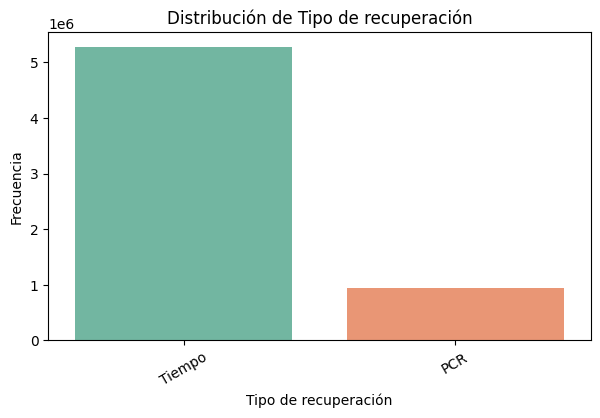

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_94779/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


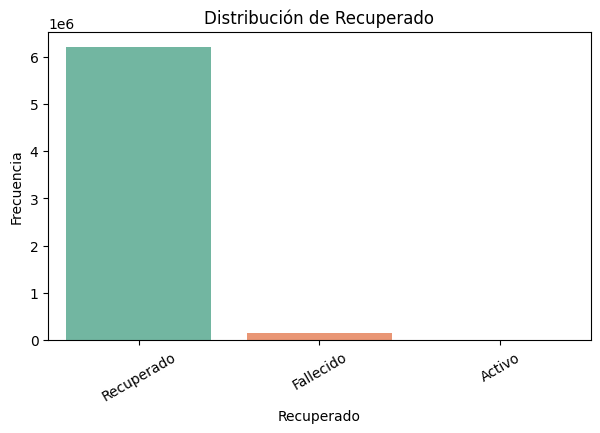

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_94779/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


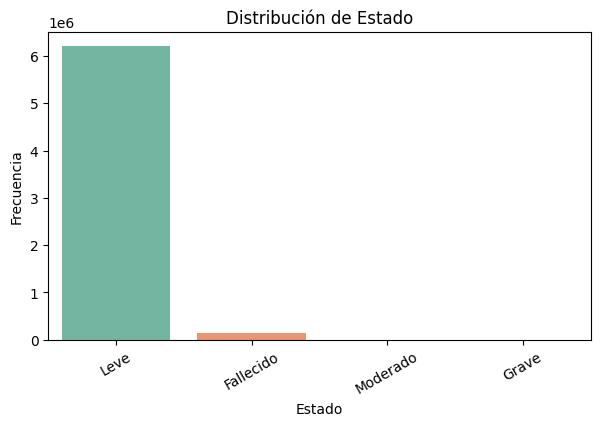

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_94779/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


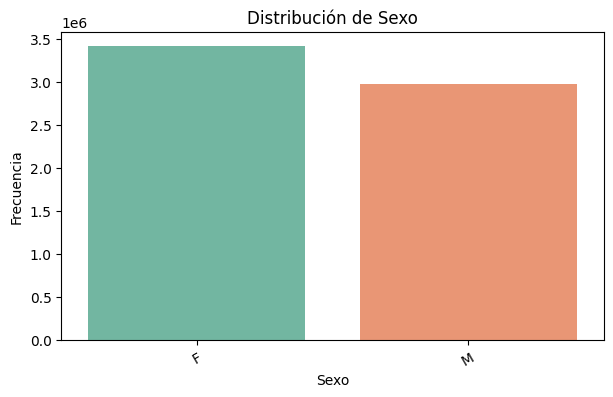

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_94779/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


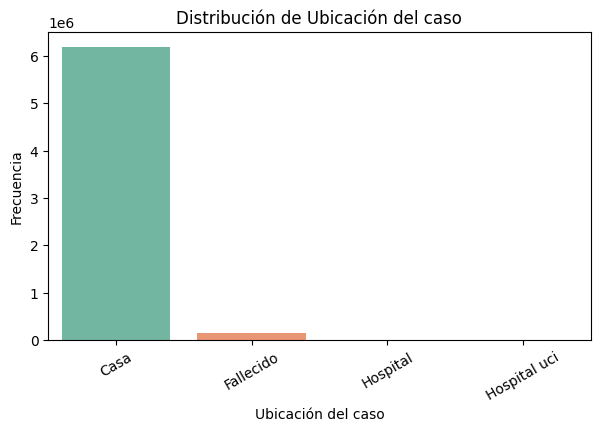

In [23]:
# Ahora graficaremos nuevamente las variables categ√≥ricas para verificar que las correcciones se aplicaron correctamente

import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas corregidas
cols_corr = ["Tipo de recuperaci√≥n", "Recuperado", "Estado", "Sexo", "Ubicaci√≥n del caso"]

for col in cols_corr:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")
    plt.title(f"Distribuci√≥n de {col}")
    plt.ylabel("Frecuencia")
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.show()


In [24]:
# En este caso, se corrigieron las inconsistencias en las categor√≠as de las variables seleccionadas, ahora vamos a analizar las que son tipo fecha
# para verificar que no haya errores o inconsistencias en los formatos.

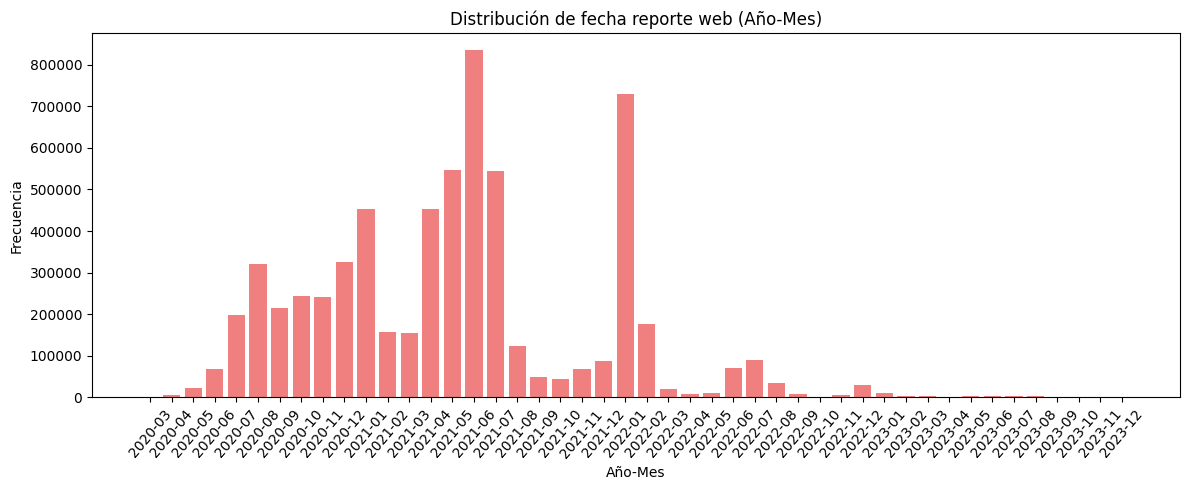

‚óè fecha reporte web_a√±o_mes: 46 categor√≠as


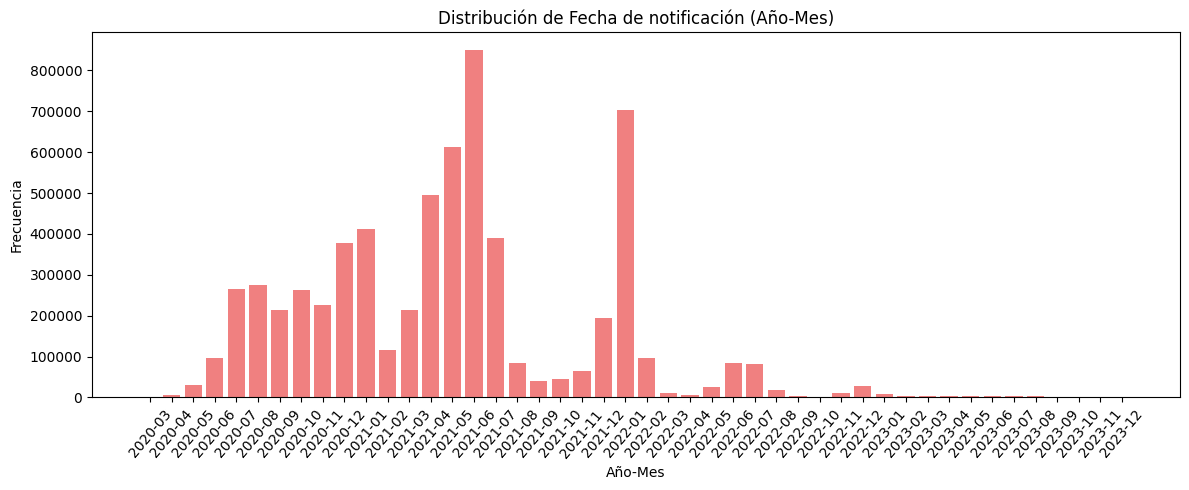

‚óè Fecha de notificaci√≥n_a√±o_mes: 46 categor√≠as


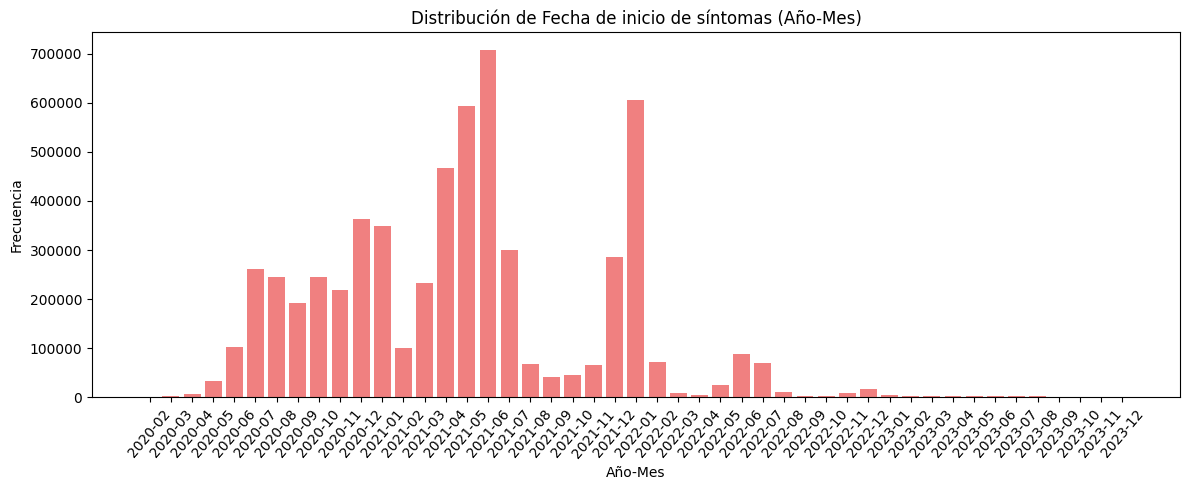

‚óè Fecha de inicio de s√≠ntomas_a√±o_mes: 47 categor√≠as


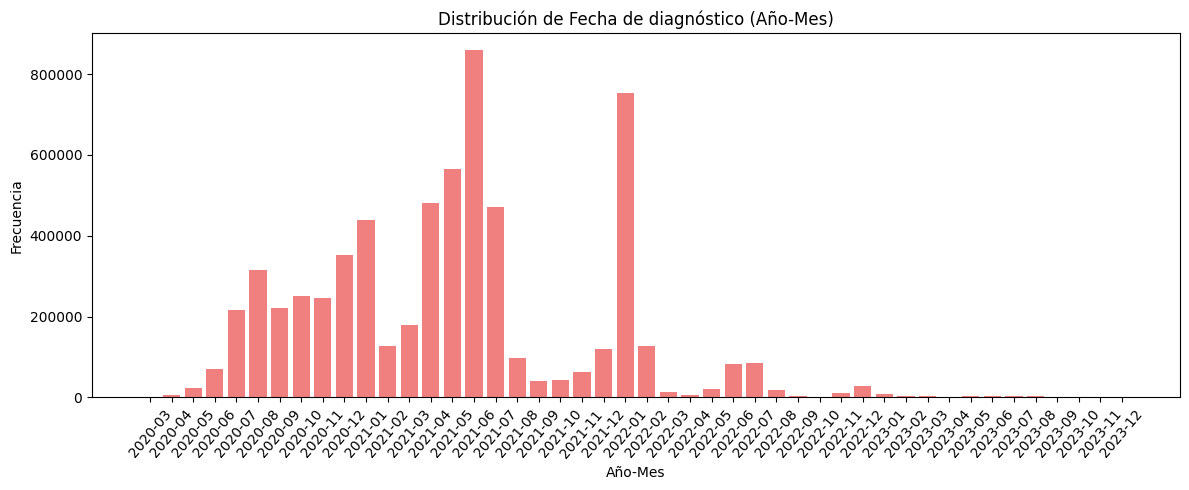

‚óè Fecha de diagn√≥stico_a√±o_mes: 46 categor√≠as


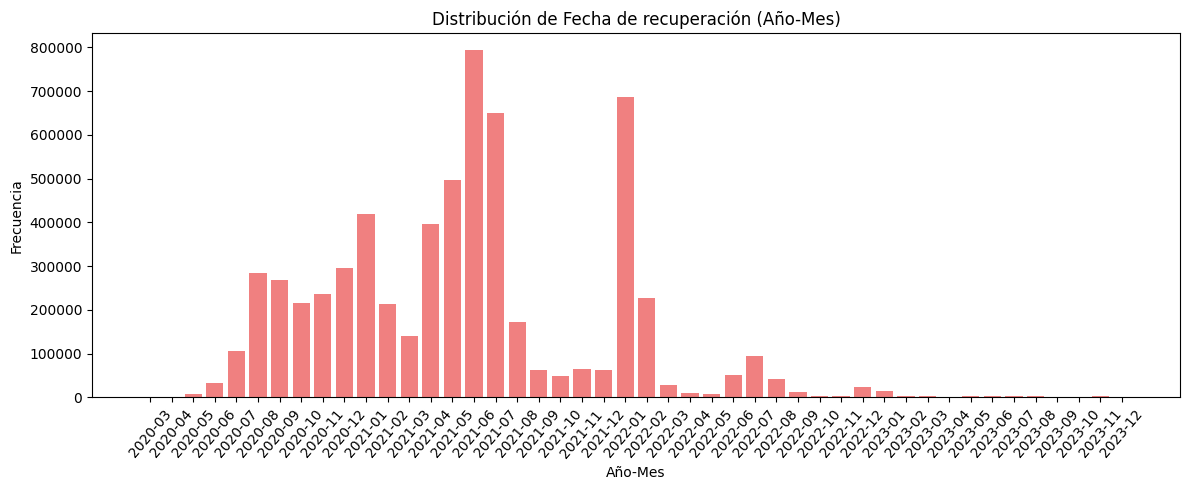

‚óè Fecha de recuperaci√≥n_a√±o_mes: 46 categor√≠as


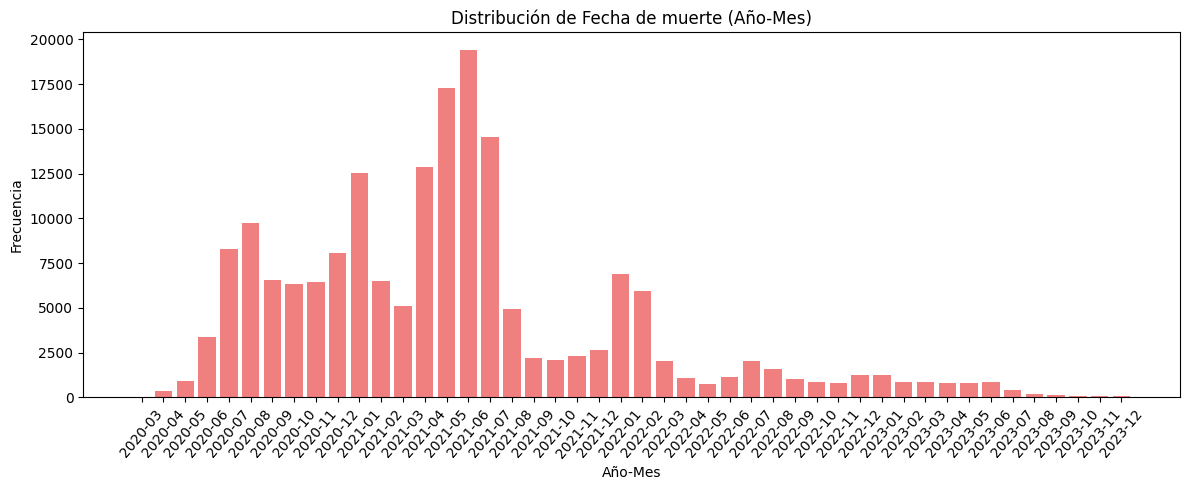

‚óè Fecha de muerte_a√±o_mes: 46 categor√≠as


In [39]:
# Lista de columnas de fechas a procesar
cols_corr = [
    "fecha reporte web",
    "Fecha de notificaci√≥n",
    "Fecha de inicio de s√≠ntomas",
    "Fecha de diagn√≥stico",
    "Fecha de recuperaci√≥n",
    "Fecha de muerte"
]

for col in cols_corr:
    # Convertir columna a datetime
    df[col] = pd.to_datetime(df[col], errors="coerce")
    
    # Crear columna con periodo A√±o-Mes
    df[col + "_a√±o_mes"] = df[col].dt.to_period("M")
    
    # Agrupar por A√±o-Mes y contar casos (ordenado cronol√≥gicamente)
    resumen = (
        df.groupby(col + "_a√±o_mes")
          .size()
          .reset_index(name="cantidad")
          .sort_values(by=col + "_a√±o_mes")
    )
    
    # Graficar distribuci√≥n
    plt.figure(figsize=(12, 5))
    plt.bar(resumen[col + "_a√±o_mes"].astype(str), resumen["cantidad"], color="lightcoral")
    plt.title(f"Distribuci√≥n de {col} (A√±o-Mes)")
    plt.ylabel("Frecuencia")
    plt.xlabel("A√±o-Mes")
    plt.xticks(rotation=50)
    plt.tight_layout()
    plt.show()
    
    # Mostrar n√∫mero de categor√≠as √∫nicas
    print(f"‚óè {col}_a√±o_mes: {df[col + '_a√±o_mes'].nunique()} categor√≠as")


El pico m√°ximo se alcanz√≥ en [2021-05]

La frecuencia de casos ha disminuido significativamente despu√©s de [2022-02]

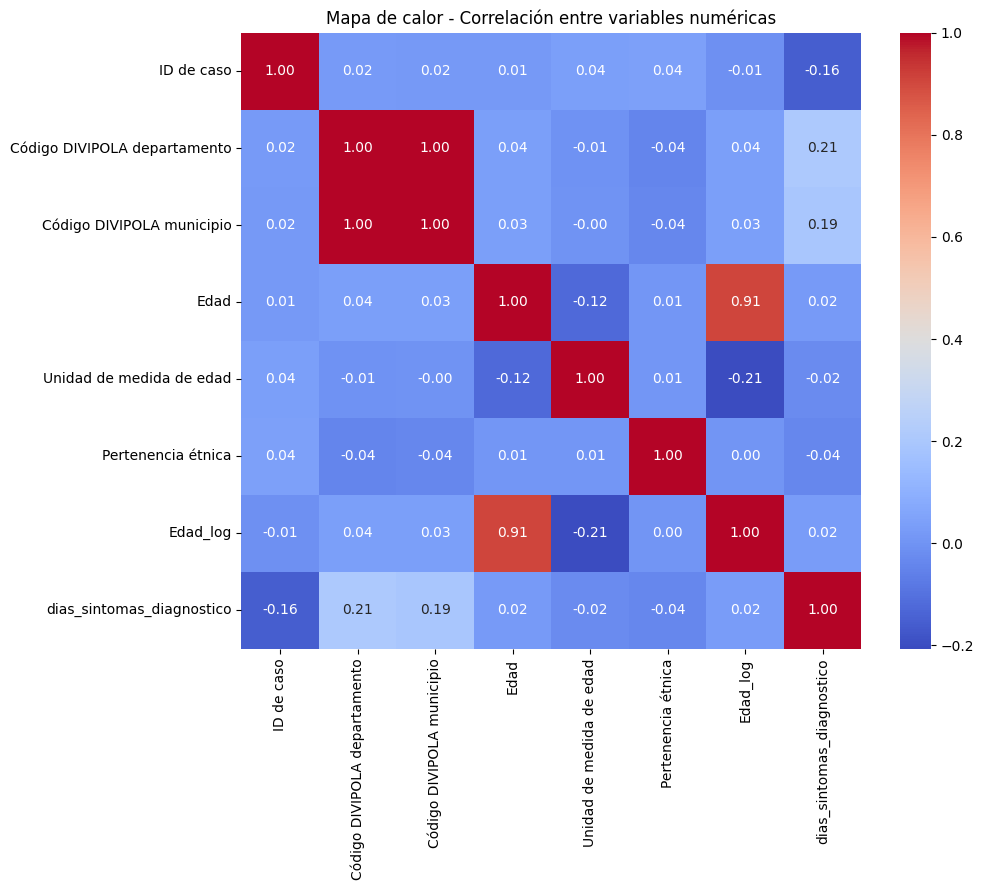

In [36]:
num_vars = df.select_dtypes(include=["int64", "float64"])

# Matriz de correlaci√≥n
corr = num_vars.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor - Correlaci√≥n entre variables num√©ricas")
plt.show()

In [ ]:
# La correlaci√≥n m√°s fuerte es entre Edad y Edad_log (0.91), lo cual es esperado porque una es transformaci√≥n de la otra
# Entre las dem√°s variables num√©ricas, las correlaciones son muy bajas (cercanas a 0)
# Esto indica que no hay relaciones lineales importantes entre Edad y las otras variables num√©ricas del dataset
# En conclusi√≥n: Edad se comporta como una variable independiente respecto a la mayor√≠a de variables num√©ricas

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_94779/1021943921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sexo", y="Edad", data=df, palette="Set2")


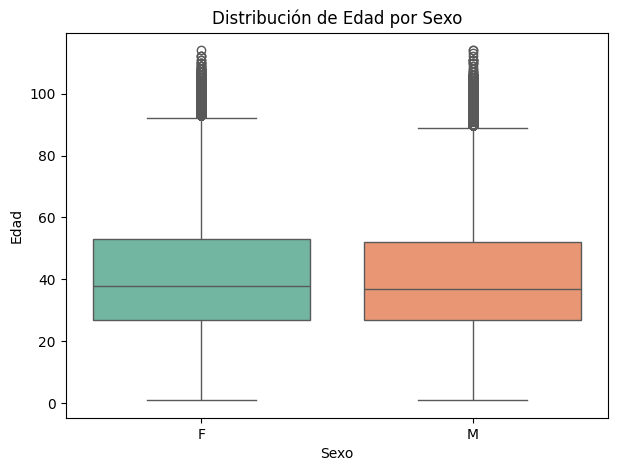

In [37]:
# Boxplot para relacionar Sexo y Edad
plt.figure(figsize=(7,5))
sns.boxplot(x="Sexo", y="Edad", data=df, palette="Set2")
plt.title("Distribuci√≥n de Edad por Sexo")
plt.show()

In [ ]:
# La distribuci√≥n de edades en hombres (M) y mujeres (F) es muy similar
# Mediana: mujeres ~38 a√±os, hombres ~37 a√±os
# El rango intercuart√≠lico en ambos sexos est√° entre los 20 y 50 a√±os
# En conclusi√≥n: Sexo y Edad no muestran diferencias sustanciales; la variable Sexo no es determinante en la distribuci√≥n de edades.

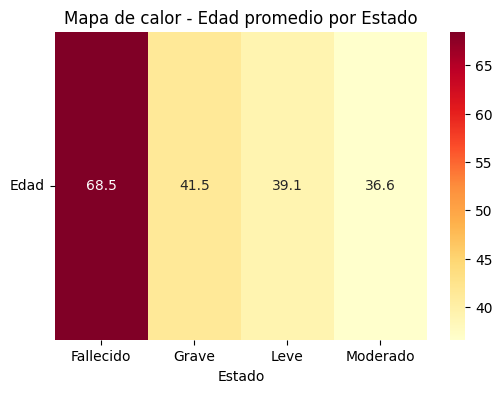

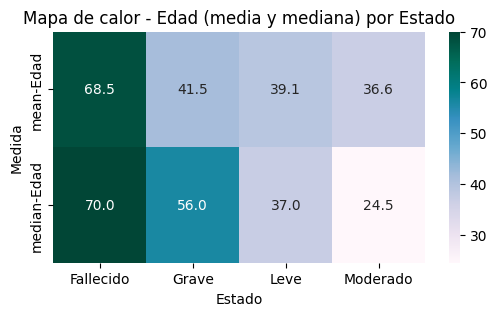

In [38]:
# Calcular edad promedio, mediana y conteo por Estado
tabla_estado = df.pivot_table(values="Edad", index="Estado", aggfunc=["mean","median","count"])

# Heatmap solo de la edad promedio
plt.figure(figsize=(6,4))
sns.heatmap(
    tabla_estado["mean"].T,
    annot=True, cmap="YlOrRd", fmt=".1f"
)
plt.title("Mapa de calor - Edad promedio por Estado")
plt.yticks(rotation=0)
plt.show()

# Heatmap con media y mediana
plt.figure(figsize=(6,3))
sns.heatmap(
    tabla_estado[["mean","median"]].T,
    annot=True, cmap="PuBuGn", fmt=".1f"
)
plt.title("Mapa de calor - Edad (media y mediana) por Estado")
plt.xlabel("Estado")
plt.ylabel("Medida")
plt.show()


In [ ]:
# Los pacientes con estado "Fallecido" presentan la edad promedio m√°s alta (~68.5 a√±os), lo que sugiere que la mortalidad est√° asociada a personas de mayor edad
# Los casos "Grave" muestran una edad promedio intermedia (~41.5 a√±os)
# Los estados "Leve" (~39.1 a√±os) y "Moderado" (~36.6 a√±os) concentran pacientes m√°s j√≥venes
# Existe una clara relaci√≥n: a mayor edad, mayor severidad y riesgo de fallecimiento

# En "Fallecido", la media (68.5) y mediana (70) son muy similares --> distribuci√≥n de edades homog√©nea en este grupo
# En "Grave", la diferencia entre media (41.5) y mediana (56) indica asimetr√≠a: hay pacientes j√≥venes que reducen la media, aunque la mayor√≠a est√° en edades m√°s altas
# En "Moderado", la media (36.6) es bastante mayor que la mediana (24.5): la presencia de algunos pacientes de edad avanzada eleva la media, pero la mayor√≠a son j√≥venes
# En general, la comparaci√≥n de media vs. mediana confirma que la severidad y mortalidad se concentran en personas mayores, mientras que los cuadros leves o moderados afectan m√°s a j√≥venes

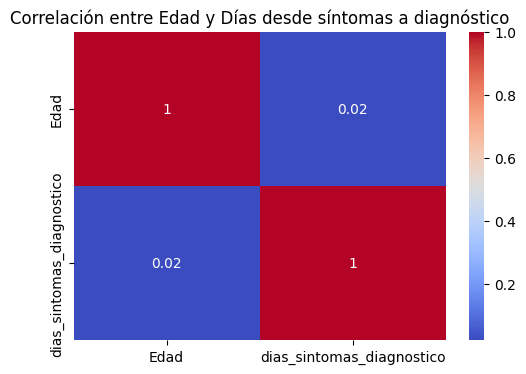

In [26]:
df["Fecha de inicio de s√≠ntomas"] = pd.to_datetime(df["Fecha de inicio de s√≠ntomas"], errors="coerce")
df["Fecha de diagn√≥stico"] = pd.to_datetime(df["Fecha de diagn√≥stico"], errors="coerce")
df["dias_sintomas_diagnostico"] = (df["Fecha de diagn√≥stico"] - df["Fecha de inicio de s√≠ntomas"]).dt.days

plt.figure(figsize=(6,4))
sns.heatmap(df[["Edad", "dias_sintomas_diagnostico"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlaci√≥n entre Edad y D√≠as desde s√≠ntomas a diagn√≥stico")
plt.show()

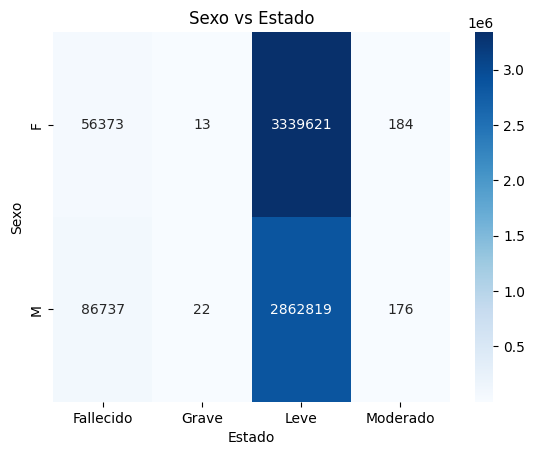

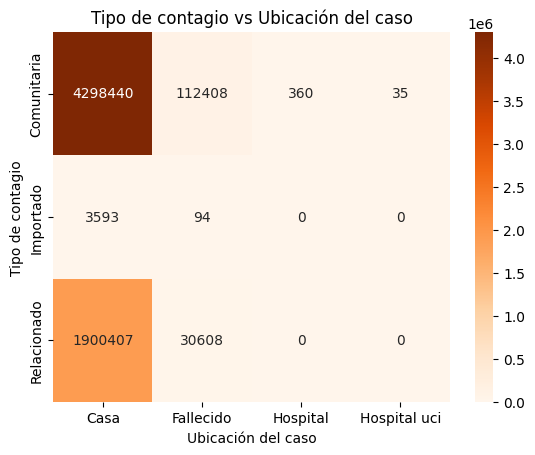

In [ ]:
tabla_sexo_estado = pd.crosstab(df["Sexo"], df["Estado"])
sns.heatmap(tabla_sexo_estado, annot=True, fmt="d", cmap="Blues")
plt.title("Sexo vs Estado")
plt.show()

tabla_tipo_ubicacion = pd.crosstab(df["Tipo de contagio"], df["Ubicaci√≥n del caso"])
sns.heatmap(tabla_tipo_ubicacion, annot=True, fmt="d", cmap="Oranges")
plt.title("Tipo de contagio vs Ubicaci√≥n del caso")
plt.show()

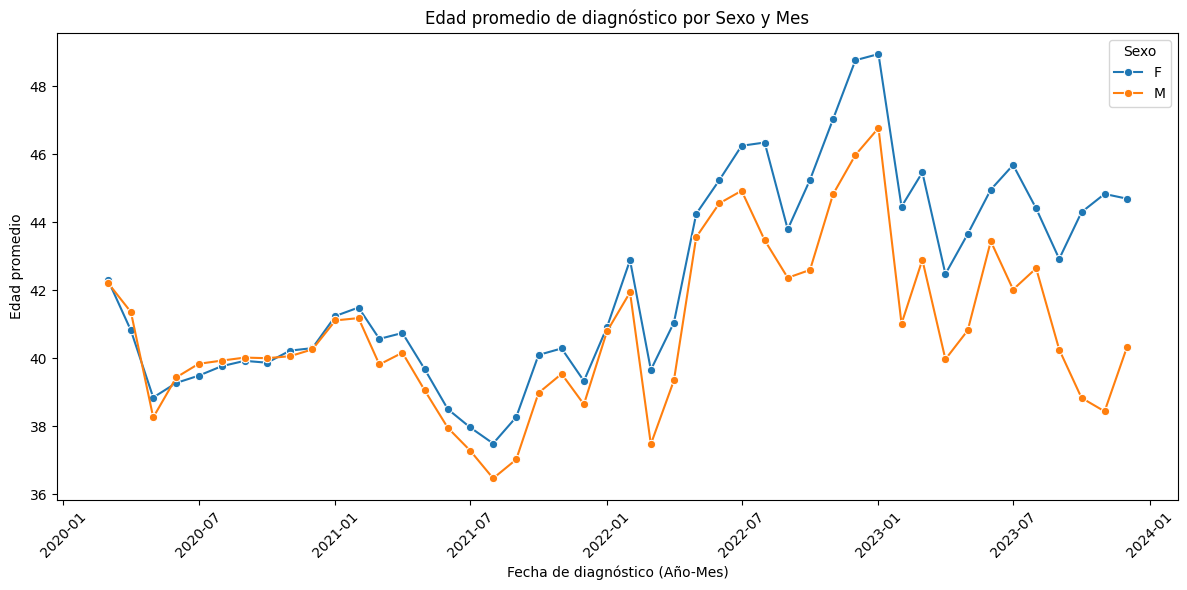

In [ ]:
df["Fecha de diagn√≥stico"] = pd.to_datetime(df["Fecha de diagn√≥stico"], errors="coerce")

# Crear columna A√±o-Mes
df["fecha_diag_ym"] = df["Fecha de diagn√≥stico"].dt.to_period("M").astype(str)

# Convertir columnas al tipo adecuado
df["Edad"] = pd.to_numeric(df["Edad"], errors="coerce")

# Agrupar: edad promedio por A√±o-Mes y Sexo
resumen = (
    df.groupby(["fecha_diag_ym", "Sexo"])["Edad"]
      .mean()
      .reset_index()
)

# Convertir fecha agrupada a datetime para graficar ordenadamente
resumen["fecha_diag_ym"] = pd.to_datetime(resumen["fecha_diag_ym"])

plt.figure(figsize=(12, 6))
sns.lineplot(data=resumen, x="fecha_diag_ym", y="Edad", hue="Sexo", marker="o")

plt.title("Edad promedio de diagn√≥stico por Sexo y Mes")
plt.xlabel("Fecha de diagn√≥stico (A√±o-Mes)")
plt.ylabel("Edad promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

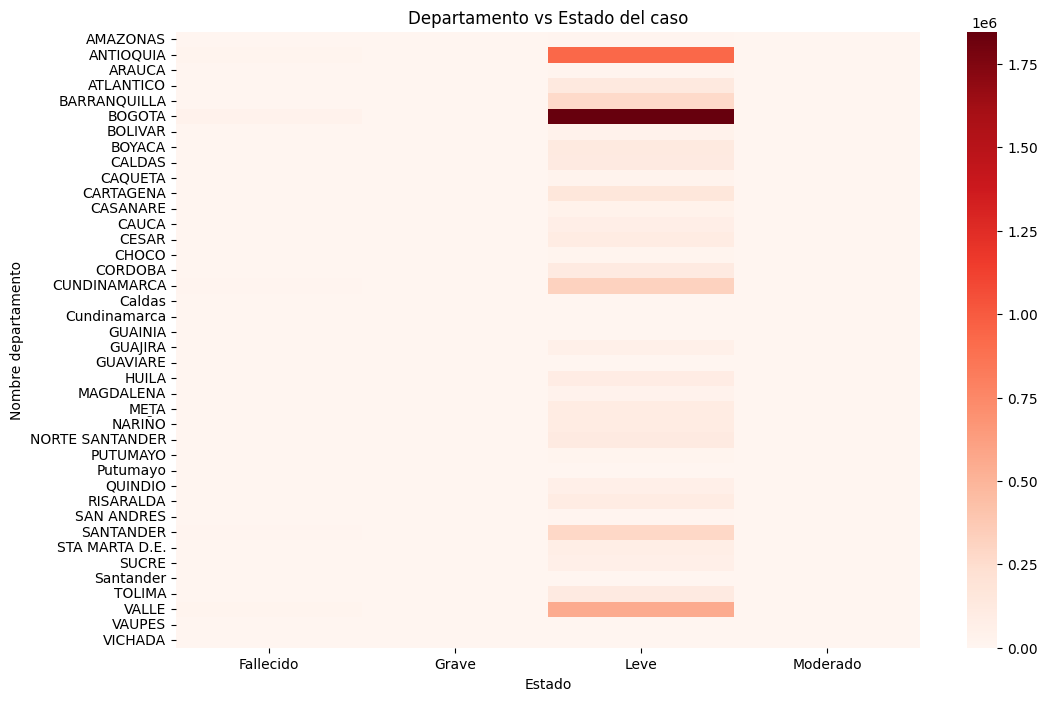

In [29]:
tabla_dep_estado = pd.crosstab(df["Nombre departamento"], df["Estado"])
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_dep_estado, cmap="Reds", cbar=True)
plt.title("Departamento vs Estado del caso")
plt.show()

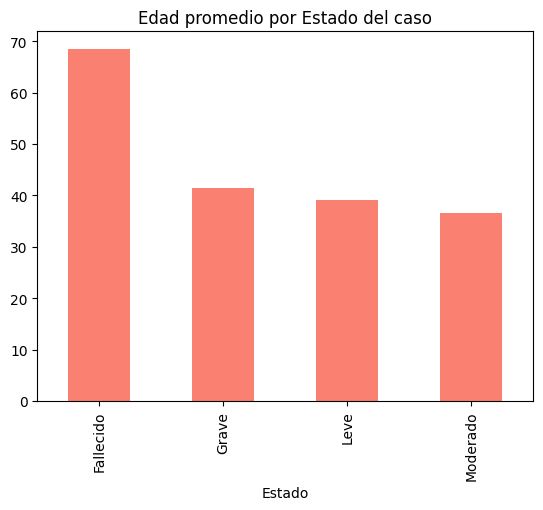

In [30]:
df.groupby("Estado")["Edad"].mean().plot(kind="bar", color="salmon")
plt.title("Edad promedio por Estado del caso")
plt.show()

In [ ]:
# Se observa c√≥mo la distribuci√≥n de las edades diagnosticadas se mantiene amplia en el tiempo
# No hay un sesgo fuerte hacia un sexo en particular, aunque puede notarse cierta concentraci√≥n de diagn√≥sticos en grupos etarios medios
# Se identifican fluctuaciones en la edad promedio diagnosticada mes a mes.
# Las diferencias entre hombres y mujeres no parecen extremas, pero s√≠ se aprecian peque√±as variaciones en determinados periodos.
# Los recuperados tienden a tener tiempos de diagn√≥stico m√°s cortos que los fallecidos
# Hay diferencias visibles en el n√∫mero de casos entre hombres y mujeres, dependiendo del estado final (recuperado, fallecido, activo).